In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path  # Importing Path module for file paths
import numpy as np

# File paths
mouse_metadata_path = Path(r"C:\Users\artsy\OneDrive\Desktop\Matplotlib\Pymaceuticals\data\Mouse_metadata.csv")
study_results_path = Path(r"C:\Users\artsy\OneDrive\Desktop\Matplotlib\Pymaceuticals\data\Study_results.csv")

# Load data into pandas DataFrames
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [23]:
# Combine the data into a single DataFrame
mouse_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


mouse_complete.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
#Checking the number of mice.
number_mice = mouse_complete['Mouse ID'].count()
print(number_mice)

1893


In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_complete[mouse_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicate_mice = duplicate_mice['Mouse ID'].unique()
print(unique_duplicate_mice)


['g989']


In [26]:
##Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = summary_stats.mean()
median_tumor_volume = summary_stats.median()
variance_tumor_volume = summary_stats.var()
std_dev_tumor_volume = summary_stats.std()
sem_tumor_volume = summary_stats.sem()

#create summary DataFrame
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
    })
# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [28]:
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [34]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = mouse_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

print(summary_stats)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [35]:
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


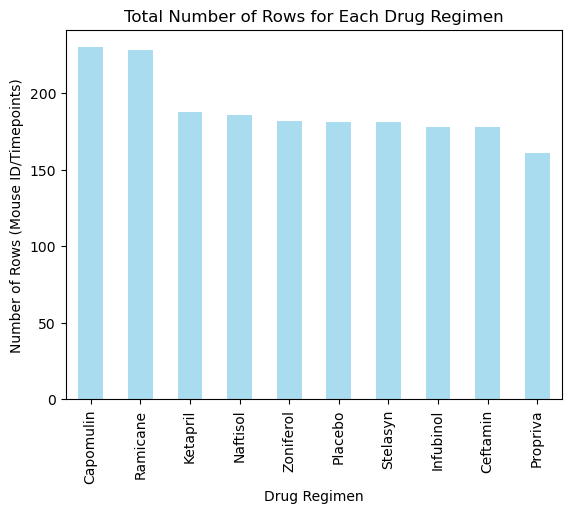

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandasab
count_per_regimen = mouse_complete['Drug Regimen'].value_counts()
count_per_regimen.plot(kind='bar', color='skyblue', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.show()

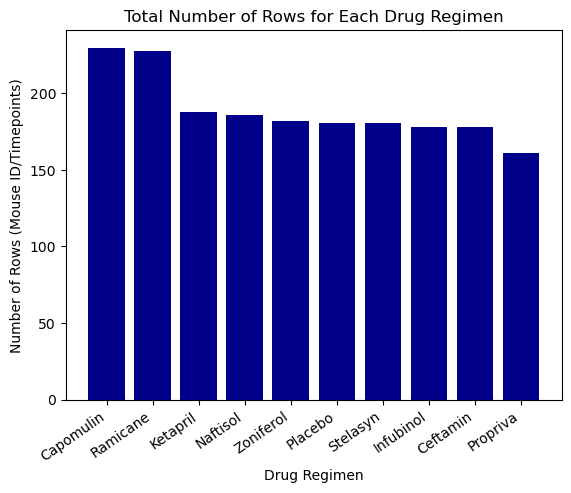

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(count_per_regimen.index, count_per_regimen.values, color='darkblue')

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

plt.xticks(rotation=35, ha='right')

plt.show()

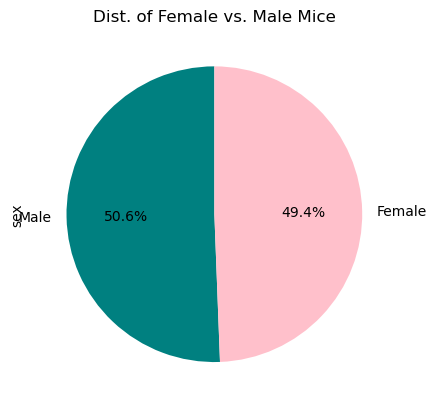

In [49]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = mouse_complete['Sex'].value_counts()

colors = ['teal', 'pink']

female_male.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Dist. of Female vs. Male Mice')
plt.ylabel('sex')

plt.show()

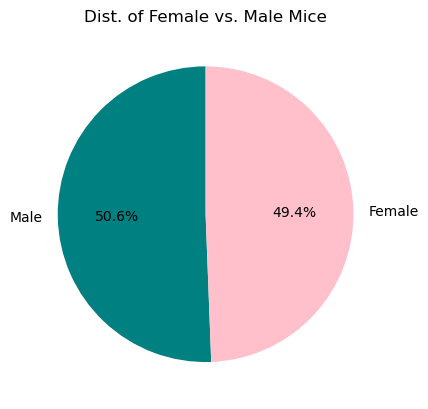

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male = mouse_complete['Sex'].value_counts()

colors = ['teal', 'pink']
#plotting the pie chart using pyplot
plt.pie(female_male, labels=female_male.index, autopct='%1.1f%%', startangle=90, colors=colors)

# title
plt.title('Dist. of Female vs. Male Mice')
#show the plot
plt.show()

In [55]:
##Quartiles, Outliers and Boxplots

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
selected_treatments = mouse_complete[mouse_complete['Drug Regimen'].isin(selected_regimens)]
# Get the last (greatest) timepoint for each mouse
last_timepoints = selected_treatments.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, mouse_complete, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with the final tumor volume
print(final_tumor_volume[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']])


   Mouse ID  Timepoint Drug Regimen  Tumor Volume (mm3)
0      a203         45    Infubinol           67.973419
1      a251         45    Infubinol           65.525743
2      a275         45     Ceftamin           62.999356
3      a411         45     Ramicane           38.407618
4      a444         45     Ramicane           43.047543
..      ...        ...          ...                 ...
95     y769         45     Ceftamin           68.594745
96     y793         45    Capomulin           31.896238
97     y865         45     Ceftamin           64.729837
98     z578         45     Ramicane           30.638696
99     z581         45    Infubinol           62.754451

[100 rows x 4 columns]


In [65]:
# treatment list
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

potential_outliars = {}
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in selected_regimens:
    tumor_vol = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)].tolist()

    tumor_vol_data.append({regimen: outliers})
    
for data in tumor_vol_data:
    for regimen, outliers in data.items():
        print(f"{regimen}'s potential_outliers: {outliers}")

Capomulin's potential_outliers: []
Ramicane's potential_outliers: []
Infubinol's potential_outliers: [36.3213458]
Ceftamin's potential_outliers: []
